<a href="https://colab.research.google.com/github/farinteractions/raspi-interactions/blob/main/Actividad_Semanal_7/TecMty_Regresion_lineal_polinomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad Semanal 7
## Notebook 1 :: Regresión

Fernando Ramirez - A01298109

# Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [27]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [28]:
#np.random.rand(100, 1)

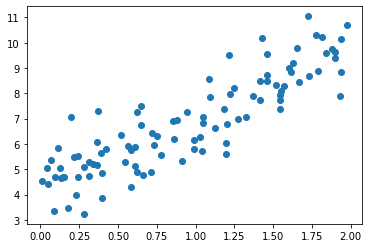

In [29]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [30]:
import pandas as pd
pd.DataFrame(y)

,0
0,6.334288
1,9.405278
2,8.483724
3,5.604382
4,4.716440
...,...
95,6.146963
96,7.059295
97,6.906398
98,4.429206


In [31]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [32]:
#X_fit[]

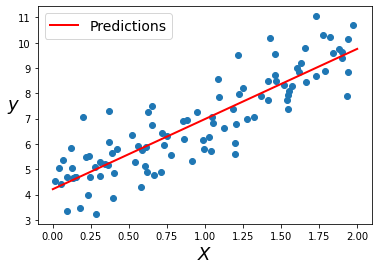

In [33]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [34]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [35]:
X_new.shape

(2, 1)

In [36]:
y_new = linear_reg.predict(X_new)
y_new

array([[4.21509616],
       [9.75532293]])

In [37]:
 linear_reg.coef_, linear_reg.intercept_

(array([[2.77011339]]), array([4.21509616]))

The model estimates:

$\hat{y} = 2.874X + 4.16$

In [38]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [39]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

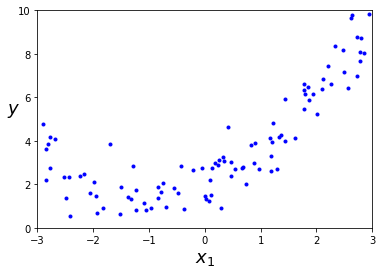

In [40]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [41]:
import pandas as pd
pd.DataFrame(y)

,0
0,6.600226
1,1.308278
2,3.011698
3,2.730748
4,0.916311
...,...
95,5.921447
96,3.236962
97,2.735053
98,1.614939


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [42]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [43]:
X_poly

array([[ 1.76886782e+00,  3.12889337e+00],
       [ 1.58225586e-02,  2.50353362e-04],
       [ 4.61423308e-01,  2.12911469e-01],
       [-4.48938371e-02,  2.01545661e-03],
       [-1.82854207e+00,  3.34356611e+00],
       [ 1.33471269e+00,  1.78145797e+00],
       [-1.31536583e+00,  1.73018725e+00],
       [-2.85410420e+00,  8.14591079e+00],
       [ 8.72833775e-01,  7.61838800e-01],
       [-1.93733592e+00,  3.75327048e+00],
       [ 2.64275151e+00,  6.98413552e+00],
       [ 2.72357146e+00,  7.41784151e+00],
       [ 2.48918634e+00,  6.19604864e+00],
       [-7.79047798e-01,  6.06915472e-01],
       [-2.90726030e+00,  8.45216246e+00],
       [ 2.56991138e+00,  6.60444448e+00],
       [-4.30895110e-01,  1.85670596e-01],
       [ 2.79992891e+00,  7.83960192e+00],
       [ 2.78171986e+00,  7.73796539e+00],
       [ 2.11805673e+00,  4.48616432e+00],
       [-1.23330665e+00,  1.52104529e+00],
       [-6.89413628e-01,  4.75291151e-01],
       [ 2.10682003e+00,  4.43869064e+00],
       [-1.

`X_poly` now contains the original feature of X plus the square of the feature:

In [44]:
print(X[0])
print(X[0]*X[0])

[1.76886782]
[3.12889337]


In [45]:
X_poly[0]

array([1.76886782, 3.12889337])

Fit the model to this extended training data:

In [46]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04630034, 0.5015459 ]]), array([1.99958228]))

The model estimates:

$\hat{y} =  1.047X +0.513X^2 + 2.13$

Plot the data and the predictions:

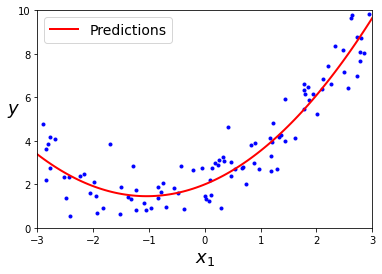

In [47]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [48]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
522,4.522099,35.184621
636,4.955669,39.806448
432,4.229502,42.065907
961,6.942155,23.531414
932,6.488086,33.202574
338,3.941359,39.665873
724,5.248591,33.973200
935,6.532977,25.434653
21,1.784342,57.681940
916,6.312071,32.452728


In [49]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [50]:
len(X)

1000

In [51]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

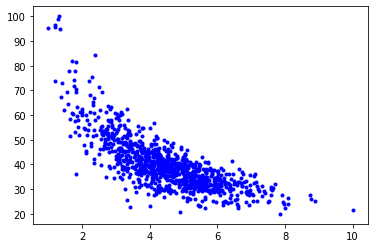

In [52]:
plt.plot(X,y,'b.')

In [53]:
# additional Libraries
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


In [54]:
# data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)


### Lineal

In [55]:
#lineal

In [56]:
# use LinearRegression and generate the model 
linear_reg = LinearRegression(fit_intercept=True)

# train the model using the data: X_train, y_train
linear_reg.fit(X_train, y_train)
linear_reg.coef_, linear_reg.intercept_

(array([-5.97912772]), 66.79997932683362)

Model Estimation:

$\hat{y} =  -5.98X + 66.8$

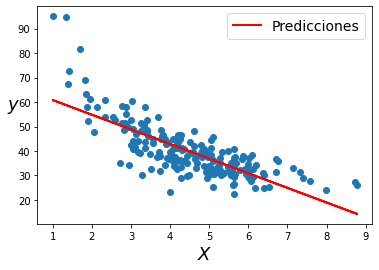

In [57]:
# use test data to test the model and plot the results
y_hat = linear_reg.predict(X_test)

plt.scatter(X_test, y_test)
plt.plot(X_test, y_hat, "r", linewidth=2, label="Predicciones")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=14);

In [58]:
# Errors
mae_lin = metrics.mean_absolute_error(y_test, y_hat)
rmse_lin = np.sqrt(metrics.mean_squared_error(y_test, y_hat))
r2_lin = r2_score(y_test, y_hat)
print('Error medio Absoluto (MAE):', mae_lin)
print('Root Mean Squared Error:', rmse_lin)
print('r2_score', r2_lin)

Error medio Absoluto (MAE): 5.033403667160277
Root Mean Squared Error: 7.067709647692056
r2_score 0.595798333672179


### Polynomial

In [59]:
#polinomial

In [60]:
# add a second degree to the equation
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)

In [61]:
# use LinearRegression to generate a model 
linear_reg_p = LinearRegression(fit_intercept=True)

# train the model using the polynomial data X_poly and output y
linear_reg_p.fit(X_train_poly, y_train)
linear_reg_p.coef_, linear_reg.intercept_

(array([-16.32506746,   1.12192589]), 66.79997932683362)

Model Estimation:

$\hat{y} =  -16.32X +1.122X^2 + 2.13$

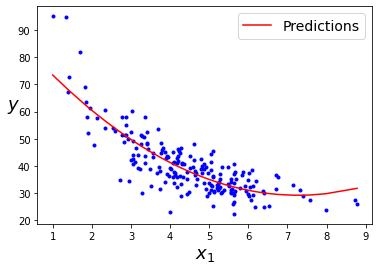

In [62]:
# use test data points to test the model and plot the results
X_test_poly = poly_features.transform(X_test)

y_hat2 = linear_reg_p.predict(X_test_poly)

orders = np.argsort(X_test.to_numpy().ravel())

plt.plot(X_test, y_test, "b.")
plt.plot(X_test.iloc[orders], y_hat2[orders], "r-", label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=14)


In [63]:
# Errors
mae_poly = metrics.mean_absolute_error(y_test, y_hat2)
rmse_poly = np.sqrt(metrics.mean_squared_error(y_test, y_hat2))
r2_poly = r2_score(y_test, y_hat2)

print('Error medio Absoluto (MAE):', mae_poly)
print('Root Mean Squared Error:', rmse_poly)
print('r2_score', r2_poly)

Error medio Absoluto (MAE): 4.410633826931783
Root Mean Squared Error: 5.9655858389751355
r2_score 0.7120302307125213


### plot for Ridge and Lasso

In [64]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

def plot_model(X, y, Xtest, ytest, model_class, polynomial, deg, alphas, **model_kwargs):
    plt.plot(Xtest, ytest, "b.", linewidth=1)
    #plt.scatter(Xtest, ytest)
    
    for alpha, style in zip(alphas, ("k:", "r-", "g+")):
        
        if alpha > 0:
            model = model_class(alpha, **model_kwargs)
        else:
            model = LinearRegression()
        if polynomial:
            model = make_pipeline(
                PolynomialFeatures(degree=deg, include_bias=False),
                StandardScaler(),
                model)
        
        # train the model
        model.fit(X, y)
        # test the model
        y_hat = model.predict(Xtest)
        
        orders = np.argsort(X_test.to_numpy().ravel())

        plt.plot(X_test.iloc[orders], y_hat[orders], style, linewidth=2,
                 label=fr"$\alpha = {alpha}$")
        
        print('Polynomial degree={}, \talpha={}, \tr2_error={}'.format(deg, alpha, r2_score(y_test, y_hat)))

    plt.legend(loc="upper right")
    plt.xlabel("$x$ - degree=" + str(deg))
    plt.grid()

### Ridge

In [65]:
from sklearn.linear_model import Ridge

In [66]:
ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X_train, y_train)

Ridge(alpha=0.1, solver='cholesky')

Polynomial degree=2, 	alpha=0, 	r2_error=0.7120302307125211
Polynomial degree=2, 	alpha=1, 	r2_error=0.7092924774796326
Polynomial degree=2, 	alpha=10, 	r2_error=0.6779342698474319
Polynomial degree=5, 	alpha=0, 	r2_error=0.756423891386925
Polynomial degree=5, 	alpha=1, 	r2_error=0.7248491505368022
Polynomial degree=5, 	alpha=10, 	r2_error=0.6873066732720592
Polynomial degree=10, 	alpha=0, 	r2_error=0.7192877665522508
Polynomial degree=10, 	alpha=1, 	r2_error=0.7266727047140552
Polynomial degree=10, 	alpha=10, 	r2_error=0.6909487566251484


[]

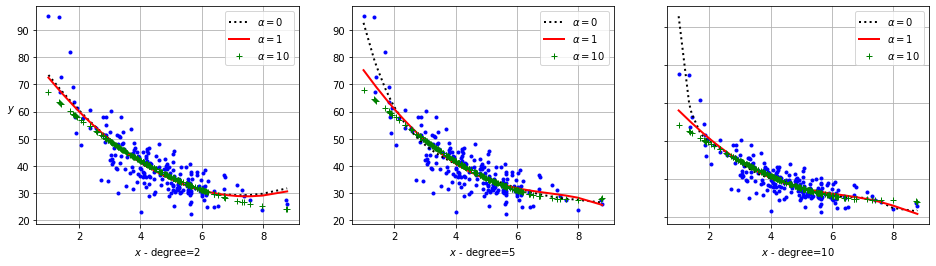

In [67]:
plt.figure(figsize=(16, 4))

plt.subplot(131)
plot_model(X_train, y_train, X_test, y_test, Ridge, polynomial=True, deg=2, alphas=(0, 1, 10), random_state=69)
plt.ylabel("$y$  ", rotation=0)

plt.subplot(132)
plot_model(X_train, y_train, X_test, y_test, Ridge, polynomial=True, deg=5, alphas=(0, 1, 10), random_state=69)

plt.subplot(133)
plot_model(X_train, y_train, X_test, y_test, Ridge, polynomial=True, deg=10, alphas=(0, 1, 10), random_state=69)

plt.gca().axes.yaxis.set_ticklabels([])

In [68]:
# after checking the plots and errors with different alpha and degrees values, we choose:
# Ridge with alpha=1 and a Polynomial with degree=5
# (there's a sloight difference between erros in polynomial 2 and 5)
# (alpha = 0 seems to overfit the model when the polynomial increases)

ridge_reg = Ridge(alpha=10)
ridge_model = make_pipeline(
                PolynomialFeatures(degree=5, include_bias=False),
                StandardScaler(),
                ridge_reg)
# train
ridge_model.fit(X_train, y_train)
ridge_reg.coef_, ridge_reg.intercept_

(array([-13.53597729,   0.59531428,   4.88096675,   2.89857432,
         -2.33023791]), 40.05315844786254)

Model Estimation:

Degree 5:

$\hat{y} =  -13.536X + 0.595X^2 + 4.881X^3 + 2.898X^4 - 2.330X^5 + 40.053$


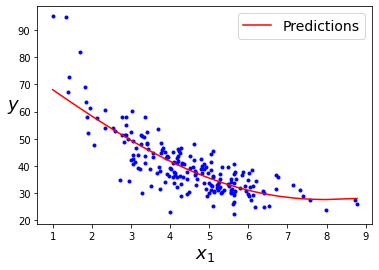

In [69]:
# use test data points to test the model and plot the results
y_hat3 = ridge_model.predict(X_test)

orders = np.argsort(X_test.to_numpy().ravel())

plt.plot(X_test, y_test, "b.")
plt.plot(X_test.iloc[orders], y_hat3[orders], "r-", label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=14)

In [70]:
# Errors
mae_ridge = metrics.mean_absolute_error(y_test, y_hat3)
rmse_ridge = np.sqrt(metrics.mean_squared_error(y_test, y_hat3))
r2_ridge = r2_score(y_test, y_hat3)

print('Error medio Absoluto (MAE):', mae_ridge)
print('Root Mean Squared Error:', rmse_ridge)
print('r2_score', r2_ridge)

Error medio Absoluto (MAE): 4.461103747963958
Root Mean Squared Error: 6.21640006638687
r2_score 0.6873066732720592


### Lasso

In [71]:
from sklearn.linear_model import Lasso


Polynomial degree=2, 	alpha=0, 	r2_error=0.7120302307125211
Polynomial degree=2, 	alpha=0.01, 	r2_error=0.7108227043539002
Polynomial degree=2, 	alpha=0.1, 	r2_error=0.6916983522727777
Polynomial degree=5, 	alpha=0, 	r2_error=0.756423891386925
Polynomial degree=5, 	alpha=0.01, 	r2_error=0.7315073629039277
Polynomial degree=5, 	alpha=0.1, 	r2_error=0.6825481310382042
Polynomial degree=10, 	alpha=0, 	r2_error=0.7192877665522508
Polynomial degree=10, 	alpha=0.01, 	r2_error=0.7336174795996029
Polynomial degree=10, 	alpha=0.1, 	r2_error=0.692175145416103


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.399e+02, tolerance: 8.743e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.358e+02, tolerance: 8.743e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[]

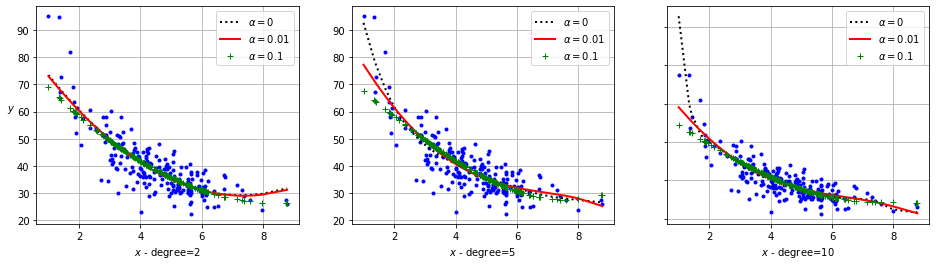

In [72]:
plt.figure(figsize=(16, 4))

plt.subplot(131)
plot_model(X_train, y_train, X_test, y_test, Lasso, polynomial=True, deg=2, alphas=(0, 0.01, 0.1), random_state=69)
plt.ylabel("$y$  ", rotation=0)

plt.subplot(132)
plot_model(X_train, y_train, X_test, y_test, Lasso, polynomial=True, deg=5, alphas=(0, 0.01, 0.1), random_state=69)

plt.subplot(133)
plot_model(X_train, y_train, X_test, y_test, Lasso, polynomial=True, deg=10, alphas=(0, 0.01, 0.1), random_state=69)

plt.gca().axes.yaxis.set_ticklabels([])

In [73]:
# after checking the plots and errors with different alpha and degrees values, we choose:
# Lasso with alpha=0.01 and a Polynomial with degree=5
# (greater than 2 polynomial degree throws a convergence warning)
# (alpha = 0 seems to overfit the model)

lasso_reg = Lasso(alpha=0.01)
lasso_model = make_pipeline(
                PolynomialFeatures(degree=5, include_bias=False),
                StandardScaler(),
                lasso_reg)
# train
lasso_model.fit(X_train, y_train)
lasso_reg.coef_, lasso_reg.intercept_



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.399e+02, tolerance: 8.743e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


(array([-28.48494431,  23.82773453,   0.        ,  -0.07594307,
         -3.55314702]), 40.05315844786256)

Model Estimation:

Degree 2:

$\hat{y} =  -21.16X +13.574X^2 + 40.053$

Degree 5:

$\hat{y} = -28.485X + 23.827X^2 - 0.076X^4 - 3.55X^5 + 40.053$

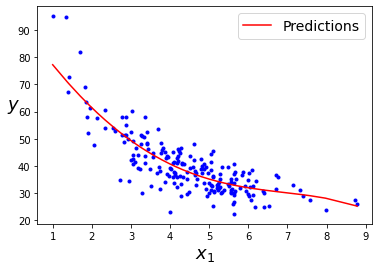

In [74]:
# use test data points to test the model and plot the results
y_hat4 = lasso_model.predict(X_test)

orders = np.argsort(X_test.to_numpy().ravel())

plt.plot(X_test, y_test, "b.")
plt.plot(X_test.iloc[orders], y_hat4[orders], "r-", label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=14)


In [75]:
# Errors
mae_lasso = metrics.mean_absolute_error(y_test, y_hat4)
rmse_lasso = np.sqrt(metrics.mean_squared_error(y_test, y_hat4))
r2_lasso = r2_score(y_test, y_hat4)

print('Error medio Absoluto (MAE):', mae_lasso)
print('Root Mean Squared Error:', rmse_lasso)
print('r2_score', r2_lasso)

Error medio Absoluto (MAE): 4.335483342801762
Root Mean Squared Error: 5.760309786458159
r2_score 0.7315073629039277


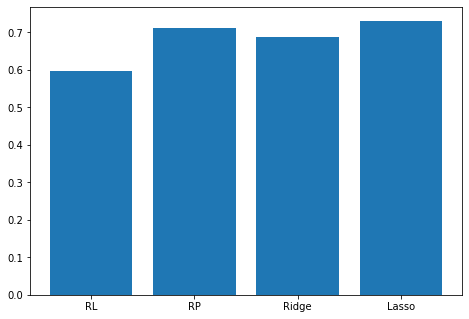

R Cuadrados: [0.595798333672179, 0.7120302307125213, 0.6873066732720592, 0.7315073629039277]


In [78]:
res = [r2_lin, r2_poly, r2_ridge, r2_lasso]
names = ['RL', 'RP', 'Ridge', 'Lasso']

fig = plt.figure()
aux = fig.add_axes([0,0,1,1])
aux.bar(names, res)
plt.show()

print('R Cuadrados:', res)

### Conclusiones

Para el modelo Lasso, la variación de los errores es muy poca al aumentar el grado del polinomio de 5 a 10. Aumetando el grado se consigue que el modelo se sobre entrene pero no mejora los resultados con datos nuevos. La  opción más económioca es manejarlo con un grado 2 a 5 y un alpha de 0.01.

Una situación similar se puede ver con Ridge, donde usar un polinomio de grado 5 o 10 no muestra mejora en los errores y en cambio parece tener un sobreentrenamiento. El uso de un alpha muy bajo en Ridge hace que la complejidad del modelo se incremente.

El modelo más conveniente es el Lasso o la Regresion Polinomial (si se quiere un modelo con menos complejidad), donde el valor de los R cuadrados es superor a 0.7, manejando unos parámetros que no llegan a sobre-entrenar el modelo.

#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [79]:
# libraries
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

# additional Libraries
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [80]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
735,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,...,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
2830,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,...,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
4106,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,...,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
16218,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,...,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
19964,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,...,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050
1227,1761300310,20140827T000000,211000.0,4,2.00,1710,8288,1.5,0,0,...,7,1710,0,1970,0,98031,47.3947,-122.174,1710,7200
18849,7732410120,20140819T000000,790000.0,4,2.50,2690,8036,2.0,0,0,...,9,2690,0,1987,0,98007,47.6596,-122.144,2420,8087
19369,7010701383,20141017T000000,680000.0,3,2.50,1800,4400,1.0,0,0,...,7,1350,450,1970,0,98199,47.6599,-122.396,1920,4400
20164,291310170,20140804T000000,384500.0,3,2.50,1600,2610,2.0,0,0,...,8,1600,0,2005,0,98027,47.5344,-122.068,1445,1288
7139,4232901990,20140516T000000,605000.0,2,1.00,910,3600,1.0,0,0,...,7,910,0,1909,0,98119,47.6341,-122.361,1720,3600


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [82]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [83]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


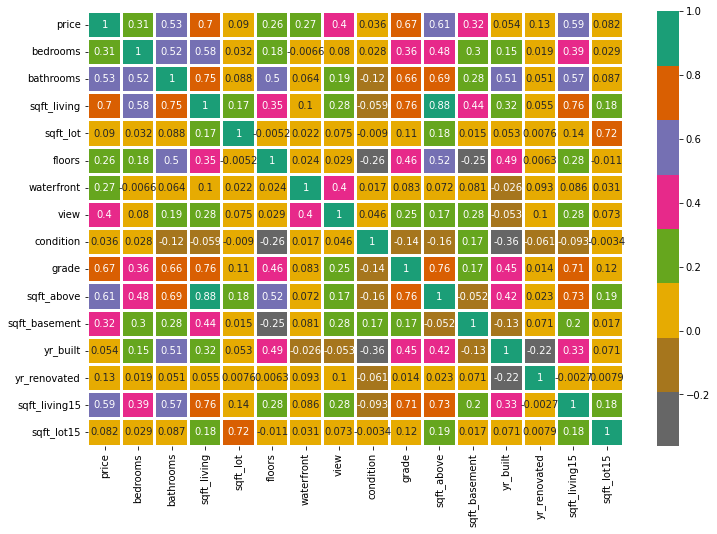

In [84]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [85]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [86]:
# Split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


In [87]:
#tu codigo aquí

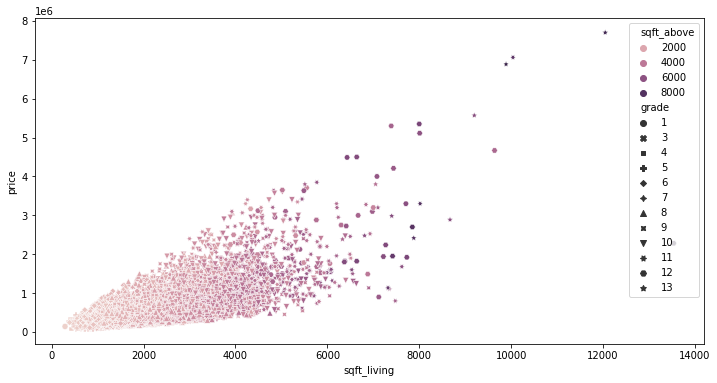

In [88]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="sqft_living", y="price", hue="sqft_above", style="grade")

In [89]:
# Linear Regression Model
linear_reg = LinearRegression(fit_intercept=True)

# train the model
linear_reg.fit(X_train, y_train)

# 15 coeficients, as we have 15 input variables
#linear_reg.coef_, linear_reg.intercept_



LinearRegression()

In [90]:
# use test data points to test the model
y_hat_lr = linear_reg.predict(X_test)
# Errors
mae_lr = metrics.mean_absolute_error(y_test, y_hat_lr)
rmse_lr = np.sqrt(metrics.mean_squared_error(y_test, y_hat_lr))
r2_lr = r2_score(y_test, y_hat_lr)

print('Error medio Absoluto (MAE):', mae_lr)
print('Root Mean Squared Error:', rmse_lr)
print('r2_score', r2_lr)

Error medio Absoluto (MAE): 137480.1388273178
Root Mean Squared Error: 232133.3676240749
r2_score 0.6579723205007814


In [91]:
# Multiple Polynomial Regression
poly_features = PolynomialFeatures(degree=5, include_bias=False)

linear_reg = LinearRegression(fit_intercept=True)
model_polyreg = make_pipeline(
                PolynomialFeatures(degree=3, include_bias=False),
                StandardScaler(),
                linear_reg)

model_polyreg.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [92]:
# use test data points to test the model and plot the results
y_hat_poly = model_polyreg.predict(X_test)

# Errors
mae_MRP = metrics.mean_absolute_error(y_test, y_hat_poly)
rmse_MRP = np.sqrt(metrics.mean_squared_error(y_test, y_hat_poly))
r2_MRP = r2_score(y_test, y_hat_poly)

print('Error medio Absoluto (MAE):', mae_MRP)
print('Root Mean Squared Error:', rmse_MRP)
print('r2_score', r2_MRP)

Error medio Absoluto (MAE): 121340.63109273964
Root Mean Squared Error: 191122.35580092302
r2_score 0.7681489377226229


In [93]:
# Ridge Regression
ridge_reg = Ridge(alpha=10)
ridge_model = make_pipeline(
                PolynomialFeatures(degree=5, include_bias=False),
                StandardScaler(),
                ridge_reg)
# train
ridge_model.fit(X_train, y_train)
ridge_reg.coef_, ridge_reg.intercept_

(array([[35421.14375013,  4039.73346121, 20637.47547581, ...,
         33158.34269006, 27928.38866793, 14609.89111186]]),
 array([539150.73672304]))

In [94]:
# use test data points to test the model and plot the results
y_hat_ridge = ridge_model.predict(X_test)

# Errors
mae_ridge = metrics.mean_absolute_error(y_test, y_hat_ridge)
rmse_ridge = np.sqrt(metrics.mean_squared_error(y_test, y_hat_ridge))
r2_ridge = r2_score(y_test, y_hat_ridge)

print('Error medio Absoluto (MAE):', mae_ridge)
print('Root Mean Squared Error:', rmse_ridge)
print('r2_score', r2_ridge)

Error medio Absoluto (MAE): 133925.56205056782
Root Mean Squared Error: 317892.92412444827
r2_score 0.35857212041575026


In [95]:
# Lasso Regression
lasso_reg = Lasso(alpha=0.01)
lasso_model = make_pipeline(
                PolynomialFeatures(degree=3, include_bias=False),
                StandardScaler(),
                lasso_reg)
# train
lasso_model.fit(X_train, y_train)
#lasso_reg.coef_, lasso_reg.intercept_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.947e+14, tolerance: 2.572e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.01))])

In [96]:
y_hat_lasso = lasso_model.predict(X_test)

# Errors
mae_lasso = metrics.mean_absolute_error(y_test, y_hat_lasso)
rmse_lasso = np.sqrt(metrics.mean_squared_error(y_test, y_hat_lasso))
r2_lasso = r2_score(y_test, y_hat_lasso)

print('Error medio Absoluto (MAE):', mae_ridge)
print('Root Mean Squared Error:', rmse_ridge)
print('r2_score', r2_ridge)

Error medio Absoluto (MAE): 133925.56205056782
Root Mean Squared Error: 317892.92412444827
r2_score 0.35857212041575026


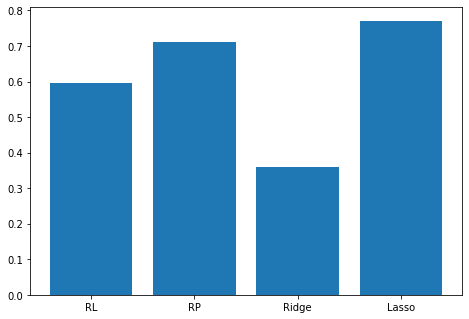

R Cuadrados: [0.595798333672179, 0.7120302307125213, 0.35857212041575026, 0.7716864978413431]


In [97]:
res = [r2_lin, r2_poly, r2_ridge, r2_lasso]
names = ['RL', 'RP', 'Ridge', 'Lasso']

fig = plt.figure()
aux = fig.add_axes([0,0,1,1])
aux.bar(names, res)
plt.show()

print('R Cuadrados:', res)

### Conclusiones

Se tienen 21613 datos, con los que se hizo una partición de 10% para validar y 90% para entrenar (2162, 19451). Después de entrenar y validar cada modelo, se analiza el error de R cuadrado determinando que la Regresión Polinomial y el Lasso son los mejores modelos, con Lasso como el que mejores resultados ofrece.

El modelo Ridge tiende a tardar más para converger, con un grado 5 toma bastante tiempo para entrenarse, y aùn así sus resultados son los más malos.

Con la maatriz de correlación se puede ver que las variables 'sqft_living', 'sqft_above', 'sqft_living15', 'grade', tienen una relación directa con el valor del precio de las casas.

Aunque se tiene una buena cantidad de records, hacer el entrenamiento 90-10 podría hacer que los modelos aprendan en sobremanera de los datos y se sobreentrenen. Sería bueno hacer otra partición, 80-20, para permitir al modelo validar con más datos desconocidos.
